<a href="https://colab.research.google.com/github/karol10542/Podstawy_nauki_o_danych/blob/main/step01_46_60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
boston_dataset = datasets.load_boston() #load data
X_full = boston_dataset.data #zbior danych obejmuje wartosci dotyczace sprzedanych domow z przedmiesc Bostonu. Są uporządkowane w kolumnach w której każda odpowiada danej cesze.
Y = boston_dataset.target


In [ ]:
print(X_full.shape)
print(Y.shape)

(506, 13)
(506,)


In [ ]:
#complete decsription about Boston Data
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#za pomocą selectKBest wybierana jest najbardziej wyrozniajaca sie cecha na podstawie dopasowania modelu do danych przy uzyciu metody .fit. W ten sposob redukujemy zbior danych do wektora.
selector = SelectKBest(f_regression, k=1)
selector.fit(X_full,Y)
X = X_full[:,selector.get_support()]
print(X.shape)

(506, 1)


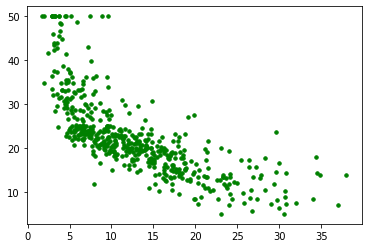

In [ ]:
#sprawdzamy zależność liniową miedzy danymi wejsciowymi(cecha) a wyjsciowymi(wartoscia domu) gdy miedzy dwoma zmiennymi wystepuje zaleznosc liniowa, dane wejsciowe zmieniaja sie w proporcjonalny sposób i w stałym kierunu wzgledem danych wejsciowych
#tworzymy funkcje ktora pokaze wykres danych i z ktorej mozemy zabserowowac czy istnieje zaleznosc liniowa

def plot_scatter(X,Y,R=None):
  plt.scatter(X,Y,s=12,marker='o',facecolor='green')
  if R is not None:
    plt.scatter(X,R, color='red',linewidth=0.3)
  plt.show()
plot_scatter(X,Y)

In [ ]:
#na wykresie możemy zauwazyc, ze wraz ze wzrostem X maleje Y. Związek między X i Y jest liniowy mozna go wyrazić Y=a+bX

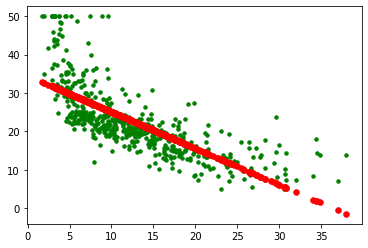

In [ ]:
#utworzenie obiektu regressor z uzcyiem prostej regresji liniowej z normalizacją cech.(model liniowy regresora)
regressor = LinearRegression(normalize=True).fit(X,Y)
plot_scatter(X,Y, regressor.predict(X))

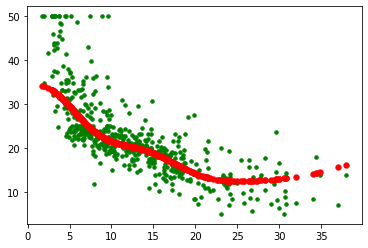

In [ ]:
#teraz uzyje dwoch modeli nieliniowych SVM i RandomForest. Metoda wektorow nosnych SVM, okreslaja zaleznosci nieliniowe, Algorytm Random Forest to inny model automatycznego rozwiazywania podobnych problemow.

regressor = SVR().fit(X,Y)
plot_scatter(X,Y,regressor.predict(X))

Teraz proste polecenia do danych, na nowym zbiorze


In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
print(iris.DESCR) #wyswietla wszystkie informacje na temat zbioru

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
print(iris.data) #zwraca wszystkie cechy

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
print(iris.feature_names) #zwraca nazwy cech 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print(iris.target) #zwraca dokladne wartosci w postaci konkretnych wartosci lub numerow klas

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(iris.target_names) #zwraca nazwy klas docelowych warttosciach

['setosa' 'versicolor' 'virginica']


In [ ]:
iris2= iris.data #zwraca liczbe obserwacji i liczbe cech uzywana do metod .data i .target

print(iris2.shape)

(150, 4)


# PANDAS

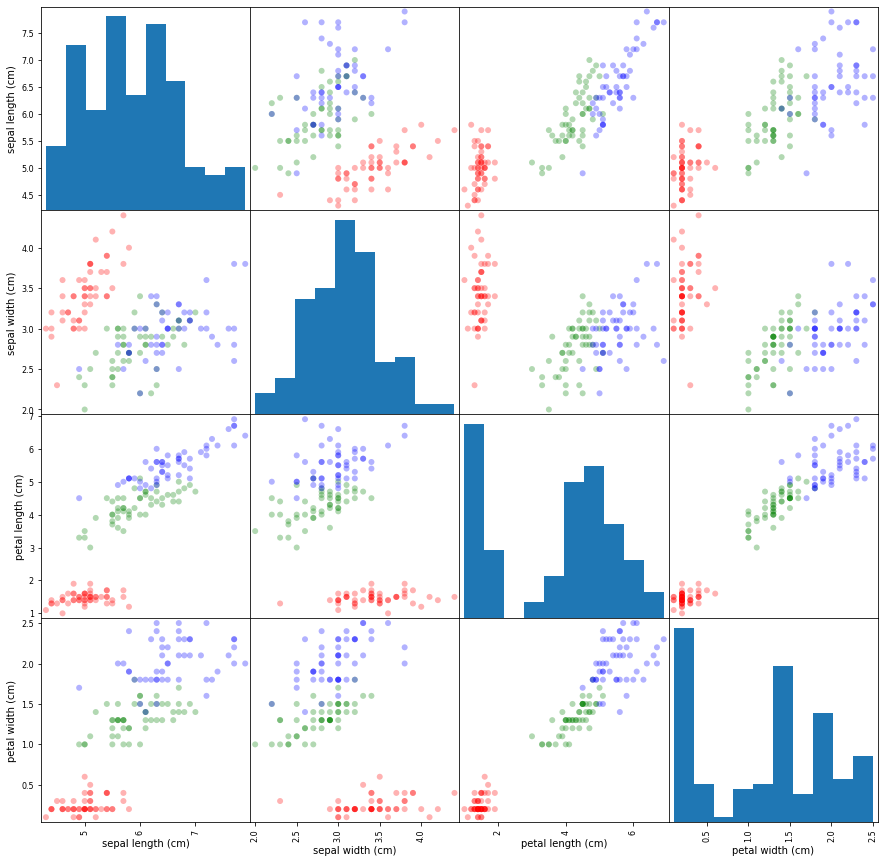

In [ ]:
import pandas as pd 
from pandas.plotting import scatter_matrix
import numpy as np
colors = list()
#za pomoca slownika palette kazda liuczobwa klasa jest przeksztalcona na lancuch znakow reprezentujacy kolor
palette= {0: "red",1:"green",2:"blue"}

for c in np.nditer(iris.target): colors.append(palette[int(c)])
dataFrame = pd.DataFrame(iris.data, columns=iris.feature_names)
sc = scatter_matrix(dataFrame, alpha=0.3, figsize=(15,15),
                       diagonal='hist', color=colors, marker='o',grid=True)




# przykladowy import danych z MLdata.org


In [ ]:
from sklearn.datasets import fetch_mldata
earthquakes = fetch_mldata('global-earthquakes')
print(eathquakes.data)
print(earthquakes.data.shape)

ImportError: ignored

Przykładowe dane z witryny LIBSVM

In [ ]:
!pip3 install urllib2

ERROR: Could not find a version that satisfies the requirement urllib2 (from versions: none)
ERROR: No matching distribution found for urllib2


In [ ]:
import urllib2
target_page = 'http://www.scise.ntu.edu.tw/ćjlin/libsvmtools/datasets/binary/ala'
a2a = urlib2.urlopen(target_page)



ModuleNotFoundError: ignored

tesowanie wydajnosci

In [ ]:
%timeit X,y = datasets.make_classification(n_samples=10**6,n_features=10,random_state=101)


NameError: ignored

In [ ]:
#oraz czas sprawdzowny na GPU:
%timeit X,y = datasets.make_classification(n_samples=10**6,n_features=10,random_state=101)


1 loop, best of 5: 792 ms per loop
